In [2]:
# NOAA API V2
# Documentation can be found at
# http://www.ncdc.noaa.gov/cdo-web/webservices/v2
import requests
class NOAAData(object):
    def __init__(self, token):
        # NOAA API Endpoint
        self.url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/'
        self.h = dict(token=token)

    def poll_api(self, req_type, payload):
        # Initiate http request - kwargs are constructed into a dict and passed as optional parameters
        # Ex (limit=100, sortorder='desc', startdate='1970-10-03', etc)
        r = requests.get(self.url + req_type, headers=self.h, params=payload)

        if r.status_code != 200:  # Handle erroneous requests
            print("Error: " + str(r.status_code))
        else:
            r = r.json()
            try:
                return r['results']  # Most JSON results are nested under 'results' key
            except KeyError:
                return r  # for non-nested results, return the entire JSON string

    # Fetch available datasets
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#datasets
    def datasets(self, **kwargs):
        req_type = 'datasets'
        return self.poll_api(req_type, kwargs)

    # Fetch data categories
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#dataCategories
    def data_categories(self, **kwargs):
        req_type = 'datacategories'
        return self.poll_api(req_type, kwargs)

    # Fetch data types
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#dataTypes
    def data_types(self, **kwargs):
        req_type = 'datatypes'
        return self.poll_api(req_type, kwargs)

    # Fetch available location categories
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#locationCategories
    def location_categories(self, **kwargs):
        req_type = 'locationcategories'
        return self.poll_api(req_type, kwargs)

    # Fetch all available locations
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#locations
    def locations(self, **kwargs):
        req_type = 'locations'
        return self.poll_api(req_type, kwargs)

    # Fetch All available stations
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#stations
    def stations(self, h, p, **kwargs):
        req_type = 'stations'
        return self.poll_api(req_type, kwargs)

    # Fetch information about specific dataset
    def dataset_spec(self, set_code, **kwargs):
        req_type = 'datacategories/' + set_code
        return self.poll_api(req_type, kwargs)

    # Fetch data
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#data
    def fetch_data(self, **kwargs):
        req_type = 'data'
        return self.poll_api(req_type, kwargs)

In [ ]:
api_token = "bbAqBKoLgDVRjDwhFYeITsMlKPxucgDp"

noaa_data = NOAAData(api_token)

# stations = noaa_data.stations()
# locations = noaa_data.locations()
# print('STATIONS:')
# for station in stations: print(station)
# print('LOCATIONS')
# for location in locations: print(location)

# categories = noaa_data.data_categories(locationid='FIPS:37', sortfield='name')
categories = noaa_data.data_categories()
data_types = noaa_data.data_types()


for i in categories: print(i)

for i in data_types: print(i)

In [15]:
import json
import requests

class WeatherGetter:
  def __init__(self, location):
    self.location = location
  def __ApiCall(self, url, headers):
    response = requests.get(url, headers = headers)
    if response.status_code == 200:
      return json.loads(response.content.decode('utf-8'))
    else:
      return None
  def __GetNwsPoints(self):
    lat = self.location["lat"]
    lon = self.location["long"]
    url = f"https://api.weather.gov/points/{lat},{lon}"
    headers = {
        "User-Agent": "(weather_getter, djb)" 
    }
    return self.__ApiCall(url, headers)
  def GetNwsWeather(self):
    points = self.__GetNwsPoints()
    office = points["properties"]["gridId"]
    gridX = points["properties"]["gridX"]
    gridY = points["properties"]["gridY"]
    url = f"https://api.weather.gov/gridpoints/{office}/{gridX},{gridY}/forecast"
    print(url)
    headers = {
        "User-Agent": "(weather_getter, wolfetechhacks@gmail.com)" 
        }
    return self.__ApiCall(url, headers)

In [17]:
sample_location = {
     "lat": "34.0522",
     "long": "-118.2437",
}

ddc_loc = {
    'lat': '40.778543410404374', 
    'long': '-73.10434971083806'
}

test = WeatherGetter(sample_location)
output = test.GetNwsWeather()
print(output)

https://api.weather.gov/gridpoints/LOX/154,44/forecast
{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld', {'@version': '1.1', 'wx': 'https://api.weather.gov/ontology#', 'geo': 'http://www.opengis.net/ont/geosparql#', 'unit': 'http://codes.wmo.int/common/unit/', '@vocab': 'https://api.weather.gov/ontology#'}], 'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-118.2618399, 34.062663], [-118.25719459999999, 34.0404501], [-118.23047399999999, 34.0442838], [-118.23511409999999, 34.0664973], [-118.2618399, 34.062663]]]}, 'properties': {'updated': '2022-08-12T09:52:15+00:00', 'units': 'us', 'forecastGenerator': 'BaselineForecastGenerator', 'generatedAt': '2022-08-12T19:42:14+00:00', 'updateTime': '2022-08-12T09:52:15+00:00', 'validTimes': '2022-08-12T03:00:00+00:00/P7DT22H', 'elevation': {'unitCode': 'wmoUnit:m', 'value': 114.9096}, 'periods': [{'number': 1, 'name': 'This Afternoon', 'startTime': '2022-08-12T12:00:00-07:00', 'endTime': '2022-08-12T18:00

In [19]:
pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres   tsun
time                                                                      
2018-01-01   8.1   6.6  11.2   1.1   0.0  211.0  26.6  59.8  1005.0   42.0
2018-01-02   6.4   5.2   8.0   5.8   0.0  229.0  22.0  50.8  1011.9   12.0
2018-01-03   8.1   5.3  10.4   6.3   0.0  227.0  36.4  83.9   999.1  144.0
2018-01-04   7.6   5.9  10.9   8.4   0.0  219.0  20.9  58.7   999.9    0.0
2018-01-05   8.5   7.1  10.2   4.8   0.0  214.0  18.7  59.4  1001.8    0.0
...          ...   ...   ...   ...   ...    ...   ...   ...     ...    ...
2018-12-27  -1.4  -2.1  -0.4   0.0   0.0  215.0   6.5  22.3  1030.7    0.0
2018-12-28  -0.5  -1.0   0.3   0.0   0.0  220.0   9.7  24.1  1031.8    0.0
2018-12-29   1.3  -0.7   4.6   0.8   0.0  215.0  16.9  45.7  1033.8    0.0
2018-12-30   7.2   4.5   8.3   0.0   0.0  253.0  17.3  48.6  1033.2    0.0
2018-12-31   6.8   5.6   9.0   0.0   0.0  203.0   9.7  43.9  1034.5    0.0

[365 rows x 10 columns]


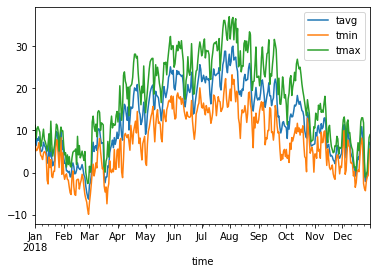

                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2018-01-01 00:00:00   0.6  -5.6  63.0   NaN   NaN  340.0  18.4   NaN  1024.6   
2018-01-01 01:00:00  -1.1  -6.6  66.0   0.0   NaN  320.0  16.6   NaN  1025.4   
2018-01-01 02:00:00  -1.1  -9.5  53.0   0.0   NaN  330.0  22.3   NaN  1025.8   
2018-01-01 03:00:00  -1.1 -10.0  51.0   0.0   NaN  330.0  25.9   NaN  1025.6   
2018-01-01 04:00:00  -1.7 -10.5  51.0   0.0   NaN  340.0  18.4   NaN  1026.1   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2018-12-31 19:00:00  20.0  17.2  84.0   0.0   NaN  200.0  18.4   NaN  1016.5   
2018-12-31 20:00:00  21.1  16.7  76.0   0.0   NaN  190.0  22.3   NaN  1015.8   
2018-12-31 21:00:00  21.1  16.1  73.0   0.0   NaN  180.0  27.7   NaN  1014.7   
2018-12-31 22:00:00  21.1  15.0  68.0   0.0   NaN  190.0  27.7   NaN  1015.7   
2018-12-31 23:00:00  20.0  15.0  73.0   

In [21]:
# https://dev.meteostat.net/python/

from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Get daily data
data = Daily('10637', start, end)
data = data.fetch()
print(data)

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Hourly

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31, 23, 59)

# Get hourly data
data = Hourly('72219', start, end)
data = data.fetch()

# Print DataFrame
print(data)